### Сбор и хранение данных
--------------------------

#### 1. Импорт библиотек и данных

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
# Импорт данных
model_stat = pd.read_csv('/datasets/query_1.csv')
city_stat = pd.read_csv('/datasets/query_3.csv')
week_stat = pd.read_csv('/datasets/query_last.csv')


In [4]:
model_stat.to_csv('model.csv')
city_stat.to_csv('city.csv')
week_stat.to_csv('week_1.csv')

#### 2. Ознакомление с данными

In [3]:
# посмотрим на данные о среднем количестве полетов различных моделей самолетов
model_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [4]:
# т.к в таблице всего 8 строк выведем их все в порядке убывания
# и сохраним отсортированными по убыванию
model_stat = model_stat.sort_values(by='flights_amount', ascending=False).reset_index(drop=True)
model_stat

,model,flights_amount
0,Cessna 208 Caravan,4557
1,Bombardier CRJ-200,4446
2,Sukhoi SuperJet-100,4185
3,Airbus A321-200,960
4,Boeing 737-300,630
5,Airbus A319-100,607
6,Boeing 767-300,600
7,Boeing 777-300,300


In [5]:
# Посмотрим на данные о среднем количестве рейсов, прибывающих в город city за день 
city_stat.info()
city_stat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [6]:
# Проверим на дубликаты
city_stat.duplicated().sum()

0

In [7]:
# округлим средние значения полетов до большего целого числа с помощью np.ceil()
city_stat['average_flights'] = city_stat['average_flights'].apply(np.ceil).astype('int')
city_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [8]:
city_stat.sample(10)

,city,average_flights
86,Усинск,1
32,Краснодар,4
42,Мирный,7
13,Владикавказ,2
77,Сургут,9
2,Анапа,3
20,Екатеринбург,12
98,Южно-Сахалинск,5
58,Нягань,1
45,Надым,3


In [9]:
# Отсортируем города по количеству рейсов в день по убыванию
# Сохраним сортировку
# Сохраним Топ-10 городов по количеству рейсов в датафрейм city_stat_top
# Выведем city_stat_top
city_stat = city_stat.sort_values(by='average_flights', ascending=False).reset_index(drop=True)
city_stat_top = city_stat.head(10)
city_stat_top

,city,average_flights
0,Москва,130
1,Санкт-Петербург,32
2,Новосибирск,18
3,Красноярск,12
4,Екатеринбург,12
5,Пермь,11
6,Ростов-на-Дону,11
7,Брянск,10
8,Ульяновск,10
9,Сочи,10


#### 3. Графики

In [10]:
# Функция для построения горизонтальных столбчатых диаграмм

def plot_barh(df, column, logic, x, y,
              size, color,  x_label,
              y_label, title):
    """
    Описание переменных
    *******************
    df -- датафрейм
    column -- столбец по которому сортируются данные методом sort_values()
    logic -- значение параметра ascending: 
        True -- сортировка по убыванию,
        False -- сортировка по возрастанию
    x, y -- столбцы по которым строится диаграмма
    size -- размер графика
    color -- цвет графика
    x_label, y_label, title -- название осей графика и заголовок
    """
    (df
        .sort_values(by=column, ascending=logic)    
        .plot(kind='barh', x=x, y=y,
            figsize=size, fontsize=15,
            color=color, legend=False)
    )
         
    
    plt.xlabel(x_label, fontsize=16,
               fontweight='bold', color='black')
    
    plt.ylabel(y_label,fontsize=16,
               fontweight='bold', color='black')
    
    plt.title(title, fontsize=15, fontweight='bold', color='navy')
    plt.show


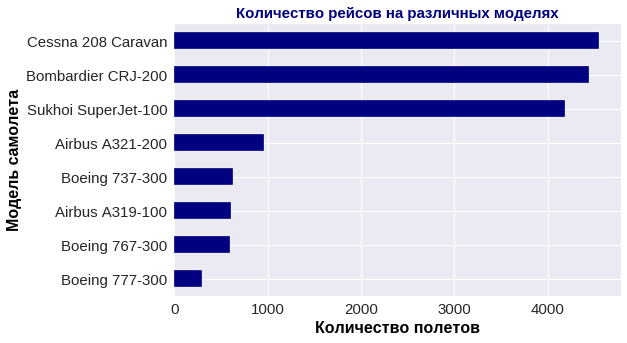

In [11]:
# модели самолетов и количество рейсов
plot_barh(model_stat, 'flights_amount', True, 'model', 
          'flights_amount', (8,5),'navy',  
          'Количество полетов', 'Модель самолета', 
          'Количество рейсов на различных моделях')

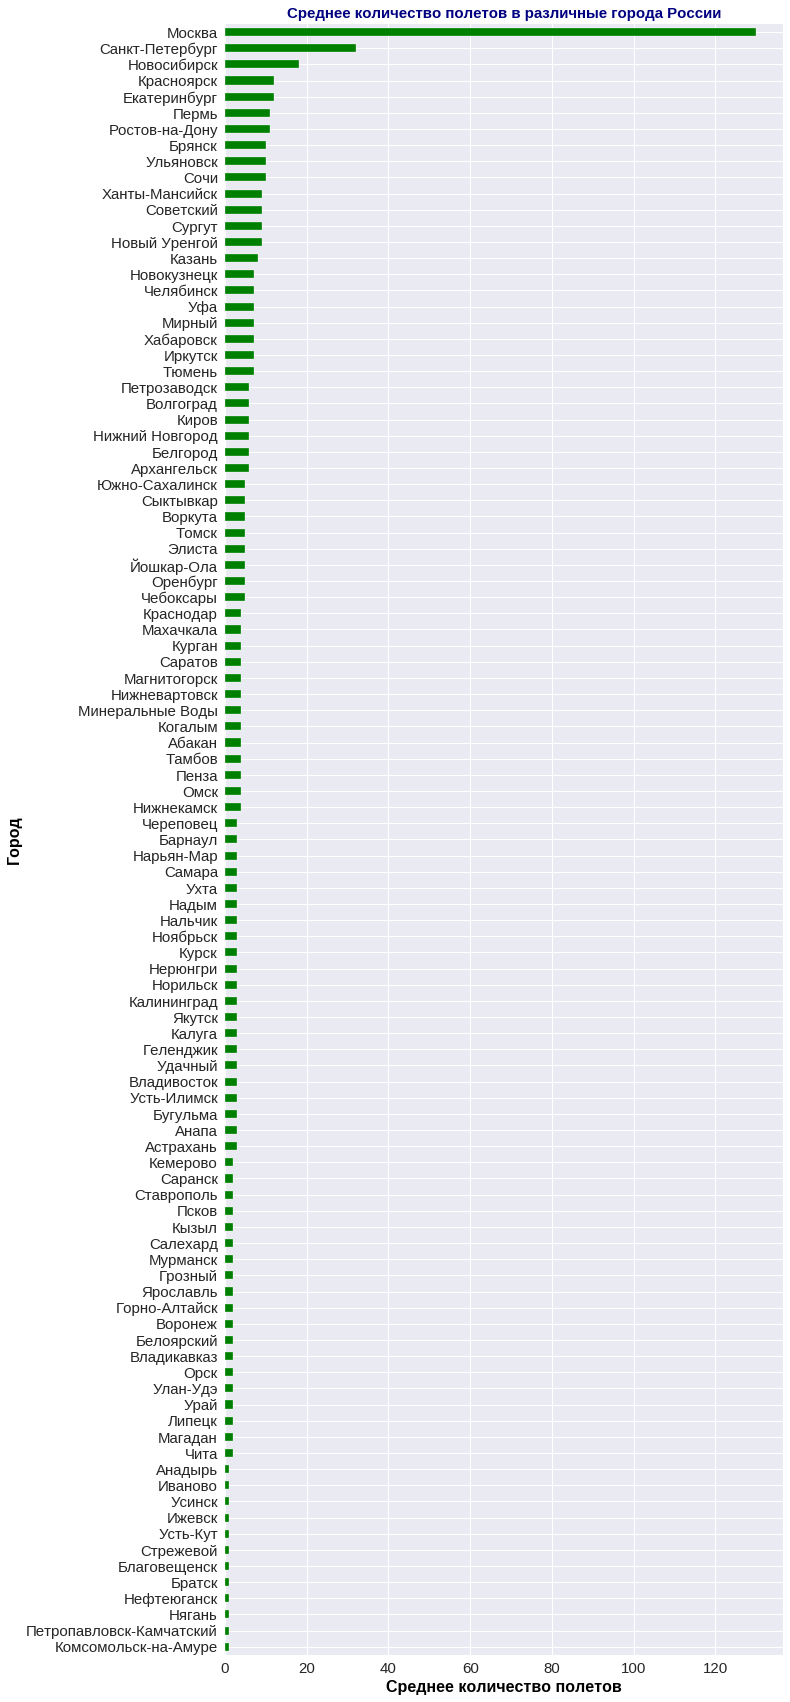

In [12]:
# города и количество рейсов
plot_barh(city_stat, 'average_flights', True, 'city', 
          'average_flights', (10,30),'green',  
          'Среднее количество полетов', 'Город', 
          'Среднее количество полетов в различные города России')

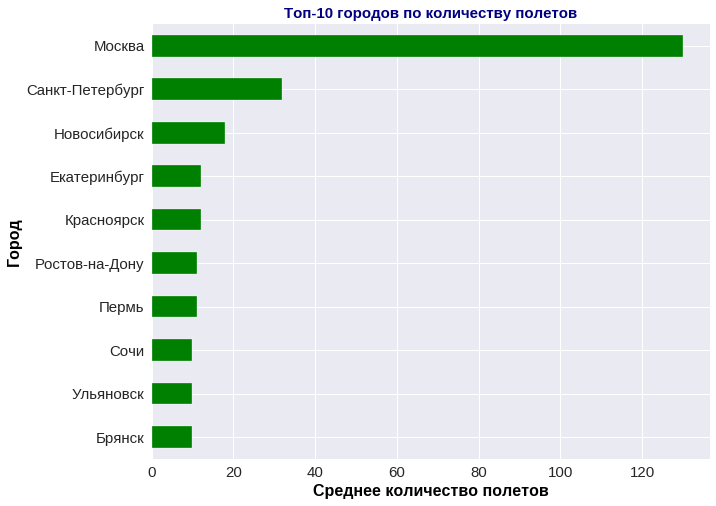

In [13]:
# Топ-10 городов и количество рейсов
plot_barh(city_stat_top, 'average_flights', True, 'city', 
          'average_flights', (10,8),'green',  
          'Среднее количество полетов', 'Город', 
          'Топ-10 городов по количеству полетов')

##### Вывод: 
------------
**Модели самолетов - количество рейсов**

* Наибольшее число полетов за сентябрь 2018 было совершено на 3-х моделях самолетов:
  * Cessna 208 Caravan  -- 4557
  * Bombardier CRJ-200  -- 4446
  * Sukhoi SuperJet-100 -- 4185
* Причем лидером списка по кол-ву полетов является Cessna 208 Caravan --
  маленький одномоторный самолет (https://ru.wikipedia.org/wiki/Cessna_208), что могло бы быть характерно для отдаленных районов, или небольших городов, но больше всего рейсов приходится на крупные города, где малая пассажирская авиация скорее всего не используется. 
* Количество полетов на Airbus и Boeing значительно меньше -- не более 960 полетов, но и количество пассажиров, перевозимых  этими самолетами за один рейс гораздо больше чем у небольшого Cessna 208 Caravan.
-------------
**Города - количество рейсов и Топ-10 городов**
* Распределение количества рейсов по городам "ненормальное",  по внешнему виду ближе к экспоненте. Количество рейсов резко убывает от Москвы (130 рейсов в день) до Ижевска, Комсомольска-на-Амуре и других городов, где в среднем 1 рейс в день.
* В Топ-10 городов входят обе столицы, причем Москва на 1-ом месте (130 рейсов), в Питере уже значительно меньше (32 рейса), в Новосибирске (3-е место) еще меньше -- 18 рейсов в день.
  последние места в Топ-10: Ульяновск, Брянск, и, что неожиданно, курортный Сочи. Возможно, летом спрос в Сочи выше.

#### 4. Гипотезы

In [14]:
# посмотрим на week_number
week_stat.info()
week_stat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 400.0+ bytes


,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [15]:
# Функция для определения наличия/отсутствия фестиваля в каждой неделе
# если в поле столбца "festival_week" присутствует NaN, то функция вернет False
def bool_cat(row):
    festival_week=row['festival_week']
    if pd.isnull(festival_week):
        return False
    return True


In [16]:
# Создадим столбец с логическими значениями наличия/отсутствия фестиваля
week_stat['presence_of_festival']=week_stat.apply(bool_cat, axis=1)

In [17]:
week_stat

,week_number,ticket_amount,festival_week,festival_name,presence_of_festival
0,30,43568,30.0,Park Live,True
1,31,51034,31.0,Пикник Афиши,True
2,32,51675,NaN,NaN,False
3,33,51378,NaN,NaN,False
4,34,51492,NaN,NaN,False
5,35,51360,NaN,NaN,False
6,36,51386,36.0,Видфест,True
7,37,51670,NaN,NaN,False
8,38,51518,NaN,NaN,False
9,39,51623,NaN,NaN,False


In [18]:
# Разделим данные о количестве билетов на два набора для последующего сравнения
# Количество билетов в дни когда есть фестиваль
ticket_amount_fest = week_stat.query('presence_of_festival==True')['ticket_amount']
# Количество билетов в дни когда нет фестиваля
ticket_amount_nonfest = week_stat.query('presence_of_festival!=True')['ticket_amount']


In [19]:
ticket_amount_fest

0    43568
1    51034
6    51386
Name: ticket_amount, dtype: int64

In [20]:
ticket_amount_nonfest

2    51675
3    51378
4    51492
5    51360
7    51670
8    51518
9    51623
Name: ticket_amount, dtype: int64

##### Формулировка гипотез и выбор критериев
* Для проверки гипотезы о среднем спросе будем использовать две независимые выборки по количеству билетов (оценка спроса) в дни когда фестиваль есть (<code>ticket_amount_fest</code>) и когда его нет (<code>ticket_amount_nonfest</code>), обозначим их как <code>TA</code> от ***ticket amount***
--------------
*Нулевая гипотеза H0:*        **TA(fest) = TA(nonfest)**  
*Альтернативная гипотеза Н1:* **TA(fest) != TA(nonfest)**  

-----------
* Будем использовать два критерия: 
  * t-test Стьюдента (используется если распределение нормальное), хотя оно таковым не является  
  * H-критерий Краскела - Уоллиса, который требует наличие хотя бы 5 наблюдений в выборке (1), в отличии от критерия Манна-Уитни, для применения которого требуется от 20 наблюдений (2). 
------------  
Источники: 
(1) https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal  
(2) https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu  



**t-test Стьюдента**

In [21]:
# Функция для проверки p-value
def ttest_independent(df1, df2):
    alpha = 0.05
    results = st.ttest_ind(df1, df2)
    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу, p-value:", results.pvalue)
    else:
        print("Не получилось отвергнуть нулевую гипотезу,  p-value:", results.pvalue)

In [22]:
ttest_independent(ticket_amount_fest, ticket_amount_nonfest)

Не получилось отвергнуть нулевую гипотезу,  p-value: 0.09688869045922928


**H-критерий Краскела - Уоллиса**

In [23]:
def kruskal(df1, df2):
    alpha = 0.05
    results = st.kruskal(df1, df2)
    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу, p-value:", results.pvalue)
    else:
        print("Не получилось отвергнуть нулевую гипотезу,  p-value:", results.pvalue)

In [24]:
kruskal(ticket_amount_fest, ticket_amount_nonfest)

Не получилось отвергнуть нулевую гипотезу,  p-value: 0.05270504179022682


* При проверке гипотезы с помощью двух критерий отвергнуть нулевую гипотезу не удалось в обоих случаях.

In [25]:
# Рассчитаем средний спрос (количество билетов) в дни когда есть фестиваль и когда его нет 
print('Фестиваль есть, количество билетов:', ticket_amount_fest.mean().round(), 'шт')
print('Фестиваля нет, количество билетов:', ticket_amount_nonfest.mean().round(), 'шт')

Фестиваль есть, количество билетов: 48663.0 шт
Фестиваля нет, количество билетов: 51531.0 шт


#### 5. Вывод

------------
**Модели самолетов - количество рейсов**

* Наибольшее число полетов за сентябрь 2018 было совершено на 3-х моделях самолетов:
  * Cessna 208 Caravan  -- 4557
  * Bombardier CRJ-200  -- 4446
  * Sukhoi SuperJet-100 -- 4185
* Причем лидером списка по кол-ву полетов является Cessna 208 Caravan --
  маленький одномоторный самолет (https://ru.wikipedia.org/wiki/Cessna_208), что могло бы быть характерно для отдаленных районов, или небольших городов, но больше всего рейсов приходится на крупные города, где малая пассажирская авиация скорее всего не используется. 
* Количество полетов на Airbus и Boeing значительно меньше -- не более 960 полетов, но и количество пассажиров, перевозимых  этими самолетами за один рейс гораздо больше чем у небольшого Cessna 208 Caravan.
-------------
**Города - количество рейсов и Топ-10 городов**
* Распределение количества рейсов по городам "ненормальное",  по внешнему виду ближе к экспоненте. Количество рейсов резко убывает от Москвы (130 рейсов в день) до Ижевска, Комсомольска-на-Амуре и других городов, где в среднем 1 рейс в день.
* В Топ-10 городов входят обе столицы, причем Москва на 1-ом месте (130 рейсов), в Питере уже значительно меньше (32 рейса), в Новосибирске (3-е место) еще меньше -- 18 рейсов в день.
  последние места в Топ-10: Ульяновск, Брянск, и, что неожиданно, курортный Сочи. Возможно, летом спрос в Сочи выше.
-------------
**Гипотезы**
* При проверке гипотезы с помощью двух критерий отвергнуть нулевую гипотезу не удалось в обоих случаях
* t-test Стьюдента (p-value>alpha), p-value: 0.09688869045922928
* H-критерий Краскела-Уоллиса (p-value>alpha), p-value: 0.05270504179022682
* Обнаружено, что когда фестиваль не проводится билетов продается даже больше, чем когда он проводится.
* **Фестиваль есть, количество билетов: 48663.0 шт**  
  **Фестиваля нет, количество билетов: 51531.0 шт**  
  
-----------
**Рекомендация**
* Количество рейсов в фестивальные дни увеличивать не нужно, повышенного спроса не наблюдается.